# Daftar Konten 

* [Pendahuluan](#Pendahuluan)
* [Inisialisasi](#Inisialisasi)
* [Memuat Data](#Memuat-Data)
* [Mempersiapkan Data](#Mempersiapkan-Data)
* [Paket Prabayar](#Paket-Prabayar)
* [Memperbaiki Data](#Memperbaiki-Data)
* [Memperkaya Kualitas Data](#Memperkaya-Kualitas-Data)
* [Pengguna](#Pengguna)
* [Panggilan](#Panggilan)
* [Pesan/SMS](#Pesan/SMS)
* [Internet](#Internet)
* [Mempelajari Syarat dan Kondisi Terkait Paket Prabayar](#Mempelajari-Syarat-dan-Kondisi-Terkait-Paket-Prabayar)
* [Mengagregasi Data per Pengguna](#Mengagregasi-Data-per-Pengguna)
* [Mempelajari Perilaku Pengguna](#Mempelajari-Perilaku-Pengguna)
* [Pendapatan](#Pendapatan)
* [Menguji Hipotesis Statistik](#Menguji-Hipotesis-Statistik)
* [Kesimpulan Umum](#Kesimpulan-Umum)

# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

## Pendahuluan
Dalam proyek ini kita akan melakukan analisis terhadap 500 data klien dari Megaline. Data-data tersebut terdapat pada beberapa tabel yang berbeda, dimana kita harus mempelajari data-data yang ada pada setiap tabel dan bagaimana hubungan pada masing-masing tabel tersebut. Kita juga akan melakukan beberapa analisis terkait perilaku pengguna dan paket prabayar yang lebih menguntungkan.

### Tujuan
menguji hipotesis bahwa:   
<ol>    
    <li>Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.</li>
    <li>Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.</li>
</ol>

### Tahapan 
Pertama kita akan memuat data dan mempelajari informasi umum yang ada pada dataset, kemudian melakukan pra-pemrosesan data seperti memeriksa missing values, duplikat dan mengganti tipe data. Kita juga dapat memperkaya kualitas data dengan mengolah data yang ada untuk mendapatkan data yang tepat untuk analisis dan jangan lupa mengecek anomali- anomali yang ada.

Kedua kita akan melakukan analisis data eksploratif dengan data-data yang sudah diolah terhadap variabel-variabel yang digunakan seperti jenis paket prabayar dan perilaku konsumen.

Ketiga kita dapat menguji hipotesis nol kita secara statistik terhadap data yang sudah diolah. kemudian tidak lupa dengan kesimpulan umum mengenai projek ini.

## Inisialisasi

Import library yang akan digunakan.

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import stats as st
import seaborn as sns

## Memuat Data

Terdapat 5 dataframe pada project kali ini :
- df_users 
- df_plans 
- df_calls 
- df_internet 
- df_messages 

In [2]:
# Muat file data ke dalam DataFrame yang berbeda
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')

## Mempersiapkan Data

Setelah memuat data yang dibutuhkan, mari kita melihat sekilas masing- masing baris awal pada tabel yang kita miliki untuk mendapatkan pemahaman awal terhadap terhadap data yang akan digunakan.

In [3]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [4]:
df_users.shape

(500, 8)

In [5]:
df_users.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [6]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [7]:
df_users.groupby('plan')['churn_date'].count()

plan
surf        23
ultimate    11
Name: churn_date, dtype: int64

In [8]:
df_users.duplicated().sum()

0

In [9]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Tabel df_users terdiri dari 500 baris dan 8 kolom. Tidak terdapat baris duplikat pada tabel karena jumlah barisnya sudah sesuai dengan jumlah data klien yang didapatkan. Terdapat missing value pada kolom churn_date, karena kolom churn date memuat tanggal klien yang pindah haluan kita dapat mengisi nilai yang hilang dengan tanggal akhir tahun karena data yang disampaikan hanya untuk satu tahun yaitu tahun 2018 dan agar tidak terdapat Nan pada tabel, tentunya tidak berarti semua klien akan pindah haluan pada akhir tahun. 

Kita juga dapat menambahkan kolom status pengguna yang berisi boolean apakah pengguna tersebut pindah haluan atau tidak.

Terdapat beberapa tipe data yang dapat dirubah seperti kolom churn_date dan reg_date yang dapat dikonversi menjadi datetime, dan juga dapat diambil bulan atau harinya.

Pada kolom city terdapat alamat kota dan negara bagiannya yang dapat dipisah juga.

In [10]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
df_plans.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

Pada tabel df_plans terdapat dua baris plan yaitu surf dan ultimate. Karena perhitungan batas kuota bulanan pengguna dala gigabita maka sebaiknya untuk datanya diubah dari megabita ke gigabita. dan untuk kolon dengan nilai usd dapat dikonversi menjadi int.

In [12]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [13]:
df_calls.shape

(137735, 4)

In [14]:
df_calls.groupby('user_id').count().shape

(481, 3)

In [15]:
df_calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [16]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [17]:
df_messages.shape

(76051, 3)

In [18]:
df_messages.groupby('user_id').count().shape

(402, 2)

In [19]:
df_messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

In [20]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [21]:
df_internet.shape

(104825, 4)

In [22]:
df_internet.groupby('user_id').count().shape

(489, 3)

In [23]:
df_internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

Tabel df_calls, df_messages, dan df_internet memiliki format yang hampir mirip, ketiganya berisi data penggunaan baik telepon sms ataupun internet. Dengan kolom user_id adalah id pengguna yang sama dengan kolom user_id pada tabel df_users. Jumlah baris pada ketiga tabel berbeda-beda:
- tabel df_calls berisi data panggilan pengguna dan durasi setiap panggilan
- tabel df_messages berisi data setiap pengguna melakukan sms 
- dan tabel df_internet berisi data megabita per sesi penggunaan internet

Ada beberapa kolom date yang bertipe data object.

Disini diketahui bahwa jumlah user_id pada setiap tabel history penggunaan kurang dari 500, apakah artinya ada pengguna yang tidak menggunakan beberapa fitur sama sekali? tentunya harus dikakukan analisa lebih lanjut terhadap hal tersebut. Dan juga pada tabel- tabel tersebut tidak terdapa jenis plan yang digunakan, yang artinya kita harus mengambil jenis plan pada setiap user_id dari tabel df_users terlebih dahulu lalu tabel df_plans sebagai parameter harga atau denda untuk paket yang melebihi jumlah penggunaan.

## Paket Prabayar

In [24]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [25]:
# Tampilkan sampel data untuk paket-paket tersebut
df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


Pada tabel paket satuan harnga yang digunakan adalah cent dan dollar,  1 USD = 100 cent jadi karena denda tambahan untuk sms dan telepon dalam cent sementara untuk paket data menggunakan dollar.

Untuk paket data bisa dikonversi mendjdi gigabita. Tapi, untuk dapat menggunakan tapel plan ini data pada tabel penggunaan harus dikonversi menjadi bulanan terlebih dahulu.

## Memperbaiki Data

Pada tabel data yang tersedia ada beberapa kolom yang seharusnya berformat datetime. Dan untuk data df_users kolom first_name, last_name, dan city akan diubah menjadi huruf kecil agar mempermudah analisis data.

In [26]:
df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

In [27]:
df_users['first_name'] = df_users['first_name'].str.lower()
df_users['last_name'] = df_users['last_name'].str.lower()
df_users['city'] = df_users['city'].str.lower()

In [28]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])


## Memperkaya Kualitas Data

Setelah dilakukan penyesuaian tipe data, selanjutnya dilakukan penambahan beberapa kolom untuk menambah kualitas data yang ada.

Pada kolom dengan tipe data datetime dilakukan pengekstrakan untuk hari dan terutama bulannya, karena data yang akan dianalisis adalah data bulanan. Untuk data durasi panggilan dilakukan pembulatan dari detik ke menit untuk setiap panggilannya, tapi untuk data internet pembulatan mb ke gb dilakukan terhadap penggunaan data perbulannya.

In [29]:
df_calls['day'] = df_calls['call_date'].dt.day
df_calls['dow'] = df_calls['call_date'].dt.dayofweek
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['day'] = df_messages['message_date'].dt.day
df_messages['dow'] = df_messages['message_date'].dt.dayofweek
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['day'] = df_internet['session_date'].dt.day
df_internet['dow'] = df_internet['session_date'].dt.dayofweek
df_internet['month'] = df_internet['session_date'].dt.month

In [30]:
df_calls['call_duration'] = np.ceil(df_calls['duration']).astype(int)

## Pengguna

In [31]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna

In [32]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [33]:
# Tampilkan sampel data pengguna

In [34]:
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
459,1459,santos,head,40,"san francisco-oakland-berkeley, ca msa",2018-04-27,ultimate,2018-12-31
366,1366,rod,huff,62,"cincinnati, oh-ky-in msa",2018-07-30,surf,2018-12-31
117,1117,hank,taylor,49,"dallas-fort worth-arlington, tx msa",2018-01-24,surf,2018-12-31
269,1269,irving,thompson,39,"dallas-fort worth-arlington, tx msa",2018-09-13,ultimate,2018-12-15
418,1418,hal,barnes,40,"new york-newark-jersey city, ny-nj-pa msa",2018-01-19,surf,2018-12-31


In [35]:
df_users['city'].value_counts().sort_values()

albany-schenectady-troy, ny msa                     1
raleigh-cary, nc msa                                1
oxnard-thousand oaks-ventura, ca msa                1
jacksonville, fl msa                                1
el paso, tx msa                                     1
                                                   ..
philadelphia-camden-wilmington, pa-nj-de-md msa    17
chicago-naperville-elgin, il-in-wi msa             19
dallas-fort worth-arlington, tx msa                21
los angeles-long beach-anaheim, ca msa             29
new york-newark-jersey city, ny-nj-pa msa          80
Name: city, Length: 73, dtype: int64

In [36]:
df_users['city'].describe()

count                                           500
unique                                           73
top       new york-newark-jersey city, ny-nj-pa msa
freq                                             80
Name: city, dtype: object

Data klien Megaline tesebar di 73 kota dan 16% klien Megaline berasal dari NY-NJ.

In [37]:
df_users['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

Pengguna termuda berumur 16 tahun dan tertua berumur 75 tahun dengan mean dan median yang berdekatan dapat dikatakan persebaran data umur tersebut cukup merata. Kita juga dapat mengelompokkan pengguna sesuai umur untuk mengecek perilaku pengguna berdasarkan umur.

### Memperbaiki Data

Beberapa pengolahan data pada tabel df_users telah dilakukan di awal.

### Memperkaya Kualitas Data

In [38]:
def age_group(age):
    if age < 26:
        return '18-25'
    if age < 31:
        return '26-30'
    if age < 41:
        return '31-40'
    if age < 51:
        return '41-50'
    if age < 61:
        return '51-60'
    else:
        return '61+'

df_users['age_group'] = df_users['age'].apply(age_group)

In [39]:
def box (df, col):
    plt.figure(figsize=(10,2))
    sns.boxplot(data=df, x=col)
    plt.tight_layout()
    plt.show()

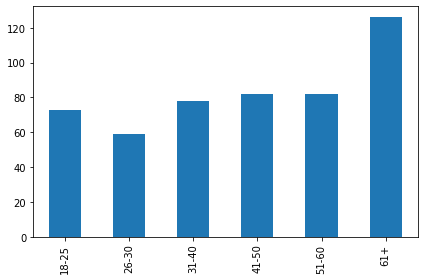

In [40]:
df_users['age_group'].value_counts().sort_index().plot(kind='bar')
plt.tight_layout()
plt.show()

## Panggilan

In [41]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan

In [42]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration       137735 non-null  float64       
 4   day            137735 non-null  int64         
 5   dow            137735 non-null  int64         
 6   month          137735 non-null  int64         
 7   call_duration  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 8.4+ MB


In [43]:
# Tampilkan sampel data berisi panggilan

In [44]:
df_calls.sample(5)

,id,user_id,call_date,duration,day,dow,month,call_duration
109530,1385_600,1385,2018-10-04,13.86,4,3,10,14
111060,1390_509,1390,2018-07-01,7.22,1,6,7,8
18487,1071_283,1071,2018-06-24,2.08,24,6,6,3
24047,1090_227,1090,2018-10-07,3.05,7,6,10,4
91220,1328_850,1328,2018-05-16,4.08,16,2,5,5


In [45]:
df_calls['call_duration'].describe()

count    137735.000000
mean          7.146673
std           5.953919
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: call_duration, dtype: float64

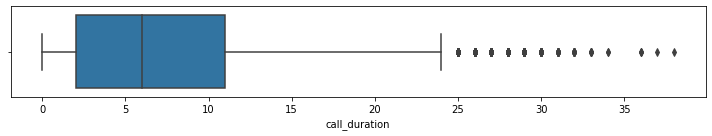

In [46]:
box(df_calls, 'call_duration')

Pada kolom durasi telepon ada beberapa nilai 0 dan nilai outlier dapat difilter.

### Memperbaiki Data

In [47]:
df = df_calls
column_name = 'call_duration'
iterations = 3

def outlier(df=None, column_name=''):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    if q1 - 1.5 * iqr < 0:
        return (0, upper)
    else:
        return (lower, upper)
    
def clean_outliers(df, column_name, iterations):
    for i in range(iterations):
        print('Start cleaning outlier iteration', i+1, 'on', column_name)
        lower, upper = outlier(df, column_name=column_name)
        df = df[(df[column_name] > lower) & (df[column_name] < upper)]
        print('Cleaning outlier iteration', i+1, 'on', column_name, 'was finished!')
    return df

df_calls = clean_outliers(df_calls, 'call_duration', 3)

Start cleaning outlier iteration 1 on call_duration
Cleaning outlier iteration 1 on call_duration was finished!
Start cleaning outlier iteration 2 on call_duration
Cleaning outlier iteration 2 on call_duration was finished!
Start cleaning outlier iteration 3 on call_duration
Cleaning outlier iteration 3 on call_duration was finished!


Pemfilteran outlier dilakukan beberapa kali agar outlier benar-benar hilang.

In [48]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109415 entries, 0 to 137734
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             109415 non-null  object        
 1   user_id        109415 non-null  int64         
 2   call_date      109415 non-null  datetime64[ns]
 3   duration       109415 non-null  float64       
 4   day            109415 non-null  int64         
 5   dow            109415 non-null  int64         
 6   month          109415 non-null  int64         
 7   call_duration  109415 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 7.5+ MB


In [49]:
outlier(df=df_calls, column_name='call_duration')

(0, 22.5)

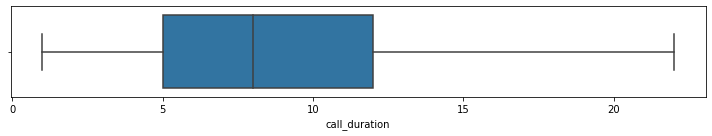

In [50]:
box(df_calls, 'call_duration')

### Memperkaya Kualitas Data

Beberapa faktor pendukung pada tabel ini sudah ditambahkan pada bagian awal pengecekan.

## Pesan/SMS

In [51]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS

In [52]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   day           76051 non-null  int64         
 4   dow           76051 non-null  int64         
 5   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.5+ MB


In [53]:
# Tampilkan sampel data untuk SMS

In [54]:
df_messages.sample(5)

,id,user_id,message_date,day,dow,month
9392,1069_338,1069,2018-11-23,23,4,11
11719,1079_118,1079,2018-10-15,15,0,10
293,1002_364,1002,2018-12-21,21,4,12
4693,1044_49,1044,2018-09-04,4,1,9
19795,1126_649,1126,2018-06-20,20,2,6


In [55]:
df_messages.groupby('user_id')['id'].count().sort_values().describe()

count     402.000000
mean      189.181592
std       192.207920
min         1.000000
25%        60.000000
50%       126.500000
75%       258.750000
max      1288.000000
Name: id, dtype: float64

<AxesSubplot:xlabel='user_id'>

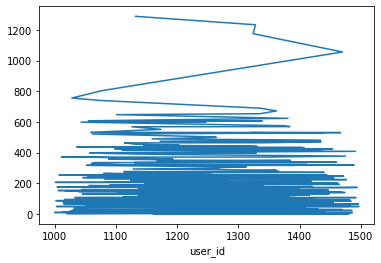

In [56]:
df_messages.groupby('user_id')['id'].count().sort_values().plot()

Dalam grafik diatas kita dapat melihat persebaran jumlah sms per user selama satu tahun dengan maksimum 1288 dan minimum 1 sms. Tentunya fitur sms tidak akan terlalu menguntungkan untuk paket ultimate karena batas kuota yang tinggi yaitu 1000 per bulan. Atau jika data klien yang ada kebanyakan hanya berlangganan beberapa bulan saja, akan sulit untuk menyimpulkannya.

### Memperbaiki Data

Beberapa pengolahan data pada tabel telah dilakukan di awal.

### Memperkaya Kualitas Data

Beberapa faktor pendukung pada tabel ini sudah ditambahkan pada bagian awal pengecekan.

## Internet

In [57]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet

In [58]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   day           104825 non-null  int64         
 5   dow           104825 non-null  int64         
 6   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 5.6+ MB


In [59]:
df_internet.groupby('user_id')['id'].count().sort_values().describe()

count    489.000000
mean     214.366053
std      159.680492
min        1.000000
25%       84.000000
50%      178.000000
75%      318.000000
max      851.000000
Name: id, dtype: float64

<AxesSubplot:xlabel='user_id'>

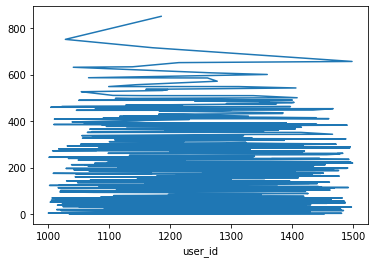

In [60]:
df_internet.groupby('user_id')['id'].count().sort_values().plot()

Dari grafik diatas kita dapat melihat perilaku penggunaan internet klien dalam setahun terakhir. Dengan minimum 1 kali sesi dan maksimum 739 sesi per tahunnya. Mungkin perilaku kecanduan gadget belum memengaruhi klien dari Megaline.

In [61]:
df_internet.groupby('user_id')['mb_used'].sum().sort_values().describe()

count       489.000000
mean      78610.968732
std       61940.374028
min          92.680000
25%       29401.530000
50%       62354.370000
75%      115737.760000
max      390159.350000
Name: mb_used, dtype: float64

Tapi jika kita lihat data diatas, ternyata jumlah sesi yang sedikit sebanding dengan penggunaan kuota sekitar 60000 mb atau sekitar 60 gb per tahunnya. Kemungkinan banyak pengguna yang hanya berlangganan beberapa bulan saja.

In [62]:
# Tampilkan sampel data untuk traffic internet

In [63]:
df_internet.sample(5)

,id,user_id,session_date,mb_used,day,dow,month
78257,1365_23,1365,2018-12-04,239.03,4,1,12
101222,1482_66,1482,2018-11-12,423.02,12,0,11
81617,1382_267,1382,2018-07-31,680.00,31,1,7
979,1006_144,1006,2018-12-22,378.47,22,5,12
5270,1029_66,1029,2018-12-26,467.54,26,2,12


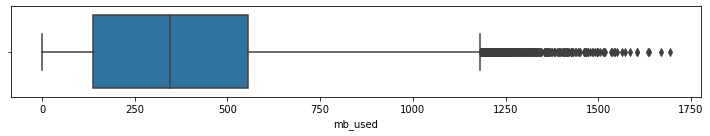

In [64]:
box(df_internet, 'mb_used')

Pada kolom durasi telepon ada beberapa nilai 0 dan nilai outlier dapat difilter.

### Memperbaiki Data

In [65]:
df_internet = clean_outliers(df_internet, 'mb_used', 5)

Start cleaning outlier iteration 1 on mb_used
Cleaning outlier iteration 1 on mb_used was finished!
Start cleaning outlier iteration 2 on mb_used
Cleaning outlier iteration 2 on mb_used was finished!
Start cleaning outlier iteration 3 on mb_used
Cleaning outlier iteration 3 on mb_used was finished!
Start cleaning outlier iteration 4 on mb_used
Cleaning outlier iteration 4 on mb_used was finished!
Start cleaning outlier iteration 5 on mb_used
Cleaning outlier iteration 5 on mb_used was finished!


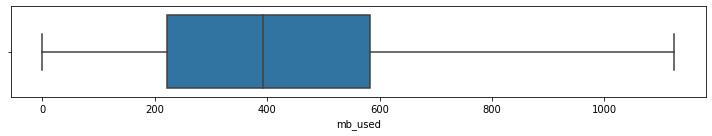

In [66]:
box(df_internet, 'mb_used')

Pemfilteran dilakukan beberapa kali agar outlier benar-benar hilang.

### Memperkaya Kualitas Data

Beberapa faktor pendukung pada tabel ini sudah ditambahkan pada bagian awal pengecekan.

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

In [67]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya

**Terdapat 2 jenis paket prabayar yang ditawarkan oleh Megaline yaitu Surf dan Ultimate**

Surf

    Biaya bulanan: $20
    500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data
    Setelah melebihi batas paket, akan dikenakan:
        1 menit: 3 sen
        1 SMS: 3 sen
        1 GB data: $10

Ultimate

    Biaya bulanan: $70
    3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data
    Setelah melebihi batas paket, akan dikenakan:
        1 menit: 1 sen
        1 SMS: 1 sen
        1 GB data: $7

Dari data tersebut terlihat perbedaan yang cukup signifikan pada harga kedua paket tersebut. Sepertinya pengguna ultimate lebih ditujukan kepada pengguna yang lebih banyak menggunakan telepon dan sms daripada paket data.

## Mengagregasi Data per Pengguna


In [68]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
calls_monthly = df_calls.groupby(['user_id', 'month'])['id'].count()
calls_monthly = pd.DataFrame(calls_monthly)
calls_monthly

id
user_id month    
1000    12     16
1001    8      22
        9      38
        10     47
        11     48
...            ..
1498    12     32
1499    9      34
        10     40
        11     39
        12     55

[2256 rows x 1 columns]

In [69]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
calls_duration_monthly = df_calls.groupby(['user_id', 'month'])['call_duration'].sum()
calls_duration_monthly 

user_id  month
1000     12       124
1001     8        182
         9        315
         10       393
         11       396
                 ... 
1498     12       339
1499     9        322
         10       360
         11       308
         12       473
Name: call_duration, Length: 2256, dtype: int64

In [70]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
messages_monthly = df_messages.groupby(['user_id', 'month'])['id'].count()
messages_monthly 

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64

In [71]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
internet_monthly = df_internet.groupby(['user_id', 'month'])['mb_used'].sum()
internet_monthly = pd.DataFrame(internet_monthly)
internet_monthly

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      12140.09
        10     22330.49
        11     18504.30
...                 ...
1498    12     22007.61
1499    9      12984.76
        10     19492.43
        11     15580.97
        12     20614.24

[2276 rows x 1 columns]

Setelah mengagregasi data pengguna untuk mendapatkan data penggunaan bulanan paket telepon, sms, dan internet kita dapat melihat bahwa jumlah total rownya berbeda pada tiab tabel yang menandakan bahwa penggunaan paket setiap pengguna berbeda-beda. 

Untuk mendapatkan gambaran yang lebih jelas, mari kita gabungkan data- data tersebut menjadi satu dataframe untuk melihat tingkat konsumsi masing- masing pengguna.

In [72]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
df_usage = pd.concat([calls_monthly, calls_duration_monthly, messages_monthly, internet_monthly], axis=1) 
df_usage.columns = ['call', 'duration', 'sms', 'mb_used']
df_usage

call  duration   sms   mb_used
user_id month                                
1000    12     16.0     124.0  11.0   1901.47
1001    8      22.0     182.0  30.0   6919.15
        9      38.0     315.0  44.0  12140.09
        10     47.0     393.0  53.0  22330.49
        11     48.0     396.0  36.0  18504.30
...             ...       ...   ...       ...
1498    12     32.0     339.0   NaN  22007.61
1499    9      34.0     322.0   NaN  12984.76
        10     40.0     360.0   NaN  19492.43
        11     39.0     308.0   NaN  15580.97
        12     55.0     473.0   NaN  20614.24

[2293 rows x 4 columns]

In [73]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,age_group
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,2018-12-31,41-50
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,2018-12-31,26-30
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,2018-12-31,31-40
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,2018-12-31,51-60
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,2018-12-31,31-40


In [74]:
df_usage = df_usage.reset_index(level='month').merge(df_users, on='user_id')

In [75]:
df_usage.head(5)

,user_id,month,call,duration,sms,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,age_group
0,1000,12,16.0,124.0,11.0,1901.47,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,2018-12-31,41-50
1,1001,8,22.0,182.0,30.0,6919.15,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,2018-12-31,26-30
2,1001,9,38.0,315.0,44.0,12140.09,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,2018-12-31,26-30
3,1001,10,47.0,393.0,53.0,22330.49,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,2018-12-31,26-30
4,1001,11,48.0,396.0,36.0,18504.30,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,2018-12-31,26-30


In [76]:
df_usage = df_usage.merge(df_plans, left_on='plan', right_on='plan_name')

In [77]:
df_usage.info()
df_usage.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   int64         
 2   call                   2256 non-null   float64       
 3   duration               2256 non-null   float64       
 4   sms                    1806 non-null   float64       
 5   mb_used                2276 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan                   2293 non-null   object        
 12  churn_date             2293 non-null   datetime64[ns]
 13  age

,user_id,month,call,duration,sms,mb_used,first_name,last_name,age,city,...,churn_date,age_group,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",...,2018-12-31,41-50,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11,2.0,10.0,15.0,2068.37,jesusa,bradford,73,"san francisco-oakland-berkeley, ca msa",...,2018-12-18,61+,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12,7.0,59.0,139.0,29559.08,jesusa,bradford,73,"san francisco-oakland-berkeley, ca msa",...,2018-12-18,61+,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10,53.0,452.0,21.0,17106.99,emely,hoffman,53,"orlando-kissimmee-sanford, fl msa",...,2018-12-31,51-60,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11,48.0,393.0,37.0,23676.72,emely,hoffman,53,"orlando-kissimmee-sanford, fl msa",...,2018-12-31,51-60,1000,30720,3000,70,7,0.01,0.01,ultimate


In [78]:
df_usage.isna().sum()

user_id                    0
month                      0
call                      37
duration                  37
sms                      487
mb_used                   17
first_name                 0
last_name                  0
age                        0
city                       0
reg_date                   0
plan                       0
churn_date                 0
age_group                  0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

Terdapat beberapa nilai yang hilang setelah digabungkan, sms memiliki jumlah nilai terbesar yaitu 487 baris, sepertinya pada tahun itu pamor sms sudah dikalahkan oleh fitur chat pada handphone .Nilai ini akan kita isi dengan 0.

In [79]:
df_usage = df_usage.fillna(0)

In [80]:
df_usage.isna().sum()

user_id                  0
month                    0
call                     0
duration                 0
sms                      0
mb_used                  0
first_name               0
last_name                0
age                      0
city                     0
reg_date                 0
plan                     0
churn_date               0
age_group                0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [81]:
df_usage.info()
df_usage.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   int64         
 2   call                   2293 non-null   float64       
 3   duration               2293 non-null   float64       
 4   sms                    2293 non-null   float64       
 5   mb_used                2293 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan                   2293 non-null   object        
 12  churn_date             2293 non-null   datetime64[ns]
 13  age

,user_id,month,call,duration,sms,mb_used,first_name,last_name,age,city,...,churn_date,age_group,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",...,2018-12-31,41-50,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11,2.0,10.0,15.0,2068.37,jesusa,bradford,73,"san francisco-oakland-berkeley, ca msa",...,2018-12-18,61+,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12,7.0,59.0,139.0,29559.08,jesusa,bradford,73,"san francisco-oakland-berkeley, ca msa",...,2018-12-18,61+,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10,53.0,452.0,21.0,17106.99,emely,hoffman,53,"orlando-kissimmee-sanford, fl msa",...,2018-12-31,51-60,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11,48.0,393.0,37.0,23676.72,emely,hoffman,53,"orlando-kissimmee-sanford, fl msa",...,2018-12-31,51-60,1000,30720,3000,70,7,0.01,0.01,ultimate


Setelah menggabungkan tabel dengan tipe paket yang digunakan, mari kita filter tabel menjadi konsumsi pengguna pertahun dari yang sebelumnya perbulan hanya untuk pengecekan.

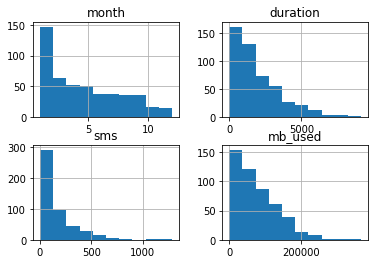

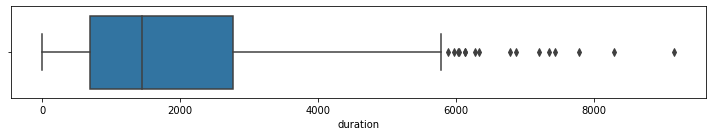

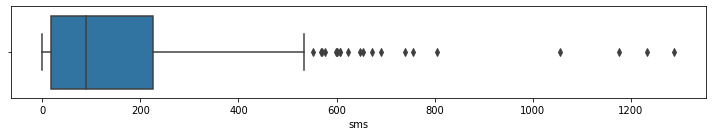

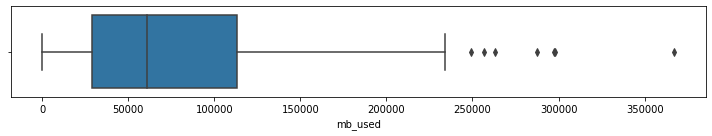

,month,duration,sms,mb_used
user_id,,,,
1000,1,124.0,11.0,1901.47
1001,5,1644.0,207.0,78120.96
1002,3,802.0,88.0,40293.33
1003,1,1052.0,50.0,24600.83
1004,8,2575.0,177.0,156352.81


In [82]:
df_usage_sum = df_usage.groupby('user_id').agg({'month':'count','duration':'sum', 'sms':'sum', 'mb_used':'sum'})
df_usage_sum.hist();
box(df_usage_sum, 'duration')
box(df_usage_sum, 'sms')
box(df_usage_sum, 'mb_used')
df_usage_sum.head()

In [83]:
df_usage_sum.describe()

,month,duration,sms,mb_used
count,490.000000,490.000000,490.000000,490.000000
mean,4.679592,1933.008163,155.206122,76637.545735
std,2.923250,1647.732832,188.625239,60111.439406
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,690.000000,17.000000,28801.080000
50%,4.000000,1444.500000,90.000000,61029.995000
75%,7.000000,2766.750000,225.000000,112942.800000
max,12.000000,9162.000000,1288.000000,367104.420000


Disini didapatkan ada 490 baris yang artinya lebih sedikit dari baris pada tabel df_users dari Megaline. Yang artinya kemungkinan ada 10 pengguna yang tidak menggunakan paketnya sama sekali.

In [84]:
user_plan = df_users[['user_id', 'plan']]
df_usage_user = pd.DataFrame(df_usage['user_id'])
def no_usage(user_id):
    if user_id in df_usage_user['user_id'].values:
        return 1
    else:
        return 0
    
user_plan_copy = user_plan.copy()
user_plan_copy['no_usage'] = user_plan_copy['user_id'].isin(df_usage_user['user_id']).astype(int)

In [85]:
user_plan_copy['no_usage'].value_counts()

1    490
0     10
Name: no_usage, dtype: int64

In [86]:
user_no_usage = user_plan_copy[user_plan_copy['no_usage'] == 0]
user_no_usage['user_id'].unique()

array([1025, 1129, 1143, 1269, 1275, 1307, 1319, 1378, 1463, 1473])

Setelah dilakukan analisa, terdapat 10 pengguna yang memiliki paket tetapi tidak digunakan sama sekali, yaitu user_id pada array diatas. Tetapi data yang digunakan sudah tidak termasuk data pengguna tersebut. 

Selanjutnya kita akan menghitung penggunaan bulanan dari setiap pengguna untuk mendapatkan pendapatan bulanannya.

Pendapatan bulanan disini adalah biaya bulanan per panggilan ditambah dengan biaya tambahan paket yang melebihi kuota. 

In [87]:
# Hitung pendapatan bulanan untuk setiap pengguna

In [88]:
def revenue(row):
    (duration, mb_used, sms, messages_included, mb_per_month_included, minutes_included,
     usd_monthly_pay, usd_per_gb, usd_per_message, usd_per_minute 
    ) = row
    add_call_cost, add_internet_cost, add_sms_cost = 0, 0, 0
    if duration > minutes_included:
        add_call_cost = (duration - minutes_included) * usd_per_minute
    if mb_used > mb_per_month_included:
        add_internet_cost = ((np.ceil(mb_used - mb_per_month_included) / 1025)) * usd_per_gb
    if sms > messages_included:
        add_sms_cost = (sms - messages_included) * usd_per_message
    return usd_monthly_pay + add_call_cost + add_internet_cost + add_sms_cost

field_to_calc = ['duration', 'mb_used', 'sms',
                'messages_included', 'mb_per_month_included', 'minutes_included',
                'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']
df_usage['revenue'] = df_usage[field_to_calc].apply(revenue, axis=1)

In [89]:
df_usage.info()
df_usage.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   int64         
 2   call                   2293 non-null   float64       
 3   duration               2293 non-null   float64       
 4   sms                    2293 non-null   float64       
 5   mb_used                2293 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan                   2293 non-null   object        
 12  churn_date             2293 non-null   datetime64[ns]
 13  age

,user_id,month,call,duration,sms,mb_used,first_name,last_name,age,city,...,age_group,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,1000,12,16.0,124.0,11.0,1901.47,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",...,41-50,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
1,1006,11,2.0,10.0,15.0,2068.37,jesusa,bradford,73,"san francisco-oakland-berkeley, ca msa",...,61+,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
2,1006,12,7.0,59.0,139.0,29559.08,jesusa,bradford,73,"san francisco-oakland-berkeley, ca msa",...,61+,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
3,1008,10,53.0,452.0,21.0,17106.99,emely,hoffman,53,"orlando-kissimmee-sanford, fl msa",...,51-60,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0
4,1008,11,48.0,393.0,37.0,23676.72,emely,hoffman,53,"orlando-kissimmee-sanford, fl msa",...,51-60,1000,30720,3000,70,7,0.01,0.01,ultimate,70.0


In [90]:
df_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   int64         
 2   call                   2293 non-null   float64       
 3   duration               2293 non-null   float64       
 4   sms                    2293 non-null   float64       
 5   mb_used                2293 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan                   2293 non-null   object        
 12  churn_date             2293 non-null   datetime64[ns]
 13  age

In [91]:
df_usage['revenue'].describe(include='all')

count    2293.000000
mean       59.812055
std        42.751691
min        20.000000
25%        21.620000
50%        68.921951
75%        70.000000
max       540.090732
Name: revenue, dtype: float64

<AxesSubplot:>

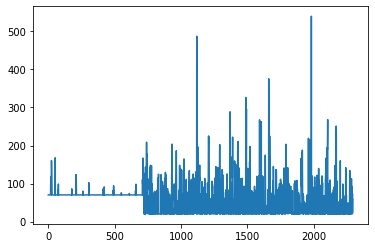

In [92]:
df_usage['revenue'].plot()

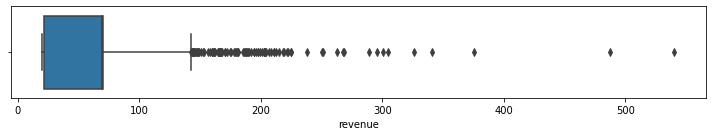

In [93]:
box(df_usage, 'revenue')

Dari grafik diatas didapatkan rata-rata dan median revenue mendekati 70 sehingga dapat diasumsikan penggunaan paket ultimate lebih efisien dari paket surf.

## Mempelajari Perilaku Pengguna

In [94]:
df_usage['plan_name'].value_counts(normalize=True) * 100

surf        68.600087
ultimate    31.399913
Name: plan_name, dtype: float64

In [95]:
plan_usage = df_usage.groupby(['plan_name', ])

In [96]:
plan_usage_sum = df_usage.groupby(['month', 'plan']).agg({'user_id':'count', 'duration':'sum', 'sms':'sum', 'mb_used':'sum', 'revenue':'sum'}).reset_index()
plan_usage_sum

,month,plan,user_id,duration,sms,mb_used,revenue
0,1,surf,2,406.0,21.0,8518.63,40.000000
1,1,ultimate,4,723.0,62.0,27672.37,280.000000
2,2,surf,9,2542.0,108.0,107128.91,295.723902
3,2,ultimate,7,2668.0,151.0,116478.06,490.000000
4,3,surf,23,7366.0,351.0,299211.00,952.014634
5,3,ultimate,12,3522.0,243.0,209586.25,840.402927
6,4,surf,50,16925.0,870.0,588764.30,1867.413902
7,4,ultimate,21,6806.0,463.0,333458.11,1509.903415
8,5,surf,77,29261.0,1849.0,1049149.40,3294.238780
9,5,ultimate,29,11314.0,931.0,466586.41,2036.842927


In [97]:
plan_usage_mean = df_usage.groupby(['month', 'plan']).agg({'user_id':'count', 'duration':'mean', 'sms':'mean', 'mb_used':'mean', 'revenue':'mean'}).reset_index()
plan_usage_mean

,month,plan,user_id,duration,sms,mb_used,revenue
0,1,surf,2,203.000000,10.500000,4259.315000,20.000000
1,1,ultimate,4,180.750000,15.500000,6918.092500,70.000000
2,2,surf,9,282.444444,12.000000,11903.212222,32.858211
3,2,ultimate,7,381.142857,21.571429,16639.722857,70.000000
4,3,surf,23,320.260870,15.260870,13009.173913,41.391941
5,3,ultimate,12,293.500000,20.250000,17465.520833,70.033577
6,4,surf,50,338.500000,17.400000,11775.286000,37.348278
7,4,ultimate,21,324.095238,22.047619,15878.957619,71.900163
8,5,surf,77,380.012987,24.012987,13625.316883,42.782322
9,5,ultimate,29,390.137931,32.103448,16089.186552,70.235963


In [98]:
# Function untuk barchart

def bar_plan_comparison(df, x, y, hue, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y=y, hue=hue, data=df, palette='Set2', linewidth=1.5)

    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(title=hue, loc='upper right')
    plt.grid(axis='y', linestyle='--')
    sns.set_style("whitegrid")
    plt.show()

In [99]:
# Function untuk histogram

def hist_plan_comparison(df, x, hue, title):
    g = sns.FacetGrid(df, col='month', col_wrap=3, height=4)
    g.map_dataframe(sns.histplot, x, hue=hue, multiple='stack', bins=10,
                    element='poly', linewidth=1.5, palette='Set2', alpha=0.7,
                    label=df[hue].unique(), legend=True)

    g.set_axis_labels(x, 'Frequency')
    g.set_titles('Month {col_name}')
    g.fig.suptitle(title, fontsize=14, y=1.02)
    for ax, col_name in zip(g.axes.flat, df['month'].unique()):
        handles, labels = ax.get_legend_handles_labels()
        unique_hues = df[df['month'] == col_name][hue].unique()
        ax.legend(handles, unique_hues, title=hue)
    plt.show()

In [100]:
# Function untuk boxplot

def boxplot_plan_comparison(df, x, y, hue, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, hue=hue, data=df, palette='Set2')

    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(title=hue, loc='upper right')
    sns.set_style("whitegrid")
    plt.show()

Mari kita cek terlebih dahulu persebaran pengguna berdasarkan data plan.

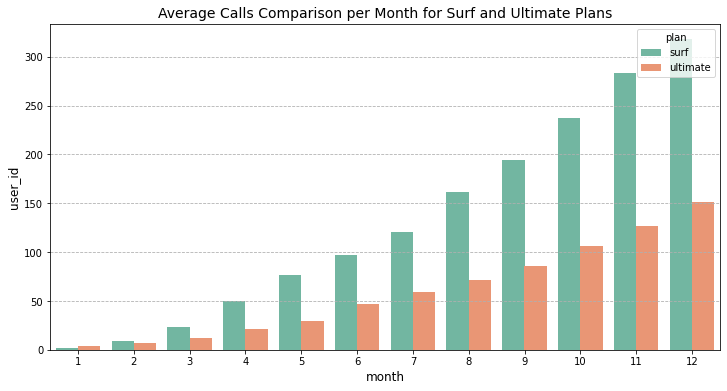

In [101]:
bar_plan_comparison(plan_usage_sum, x='month', y='user_id', hue='plan', 
                     title='Average Calls Comparison per Month for Surf and Ultimate Plans')

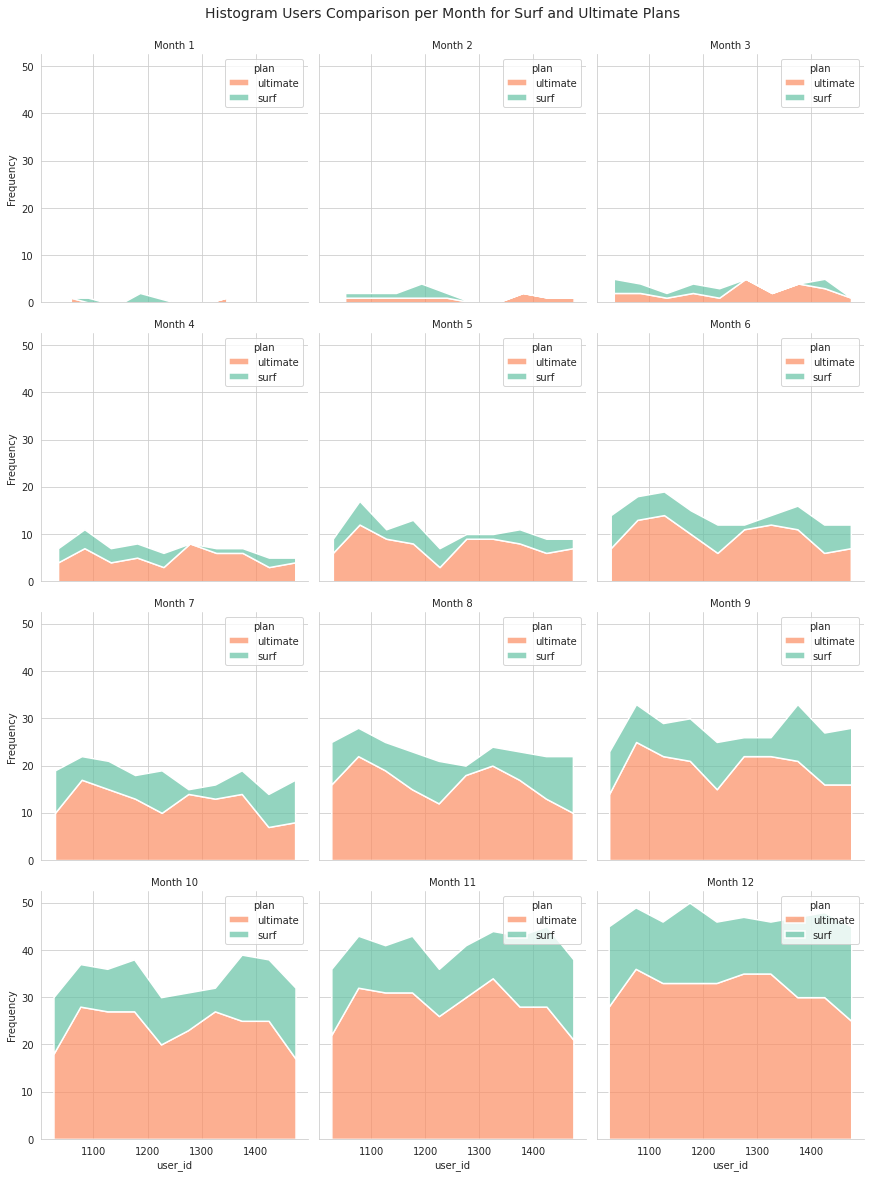

In [102]:
hist_plan_comparison(df_usage, 'user_id', 'plan', 'Histogram Users Comparison per Month for Surf and Ultimate Plans')

Dari data diatas dapat dilihat pertumbuhan jumlah pengguna pada barchart dan pertumbuhan penggunaan paket oleh pengguna pada histogram, terutama pada 3 bulan pertama dan terakhir perbedannya cukup signifikan. 

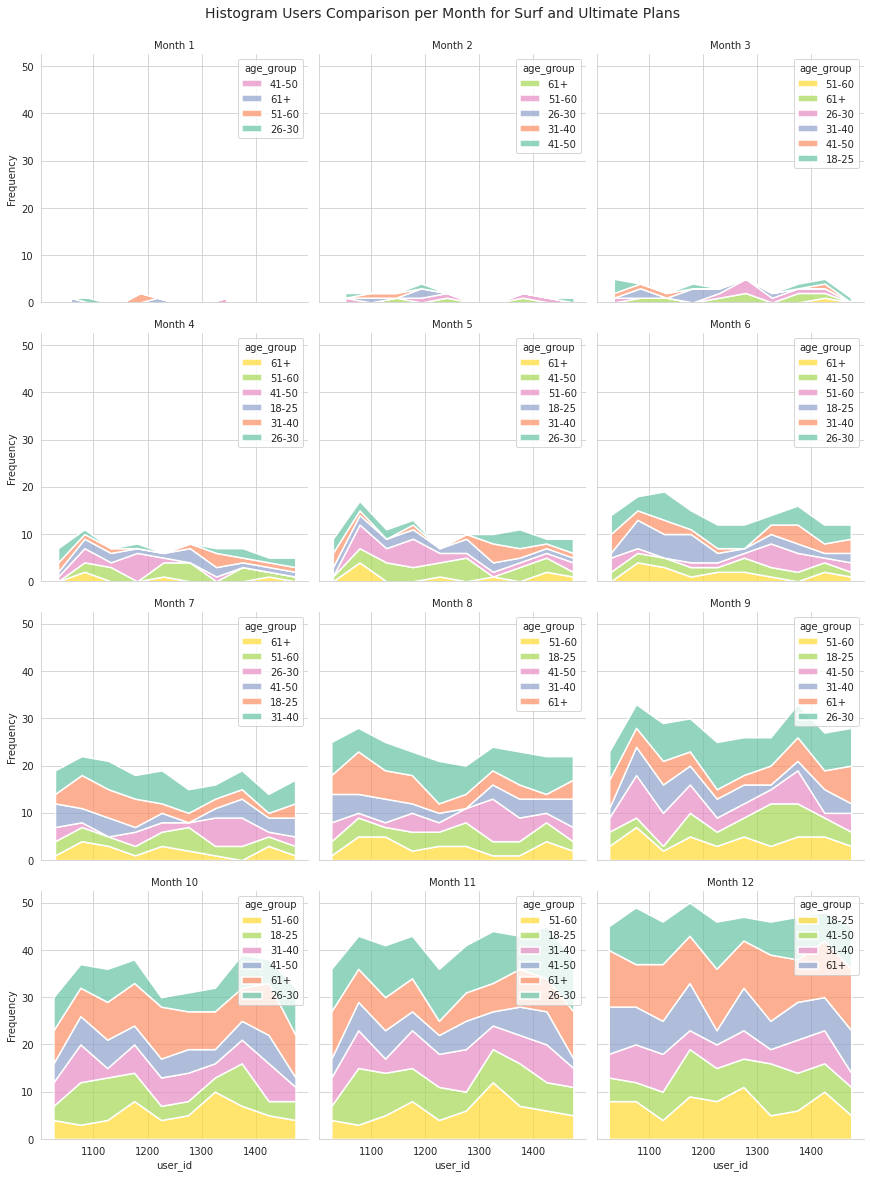

In [103]:
hist_plan_comparison(df_usage, 'user_id', 'age_group', 'Histogram Users Comparison per Month for Surf and Ultimate Plans')

In [104]:
def hist_plan_comparison2(df, x, hue, title):
    g = sns.FacetGrid(df, col='plan', col_wrap=3, height=4)
    g.map_dataframe(sns.histplot, x, hue=hue, multiple='stack', bins=10,
                    element='poly', linewidth=1.5, palette='Set2', alpha=0.7,
                    label=df[hue].unique(), legend=True)

    g.set_axis_labels(x, 'Frequency')
    g.set_titles('Plan {col_name}')
    g.fig.suptitle(title, fontsize=14, y=1.02)
    for ax, col_name in zip(g.axes.flat, df['plan'].unique()):
        handles, labels = ax.get_legend_handles_labels()
        unique_hues = df[df['plan'] == col_name][hue].unique()
        ax.legend(handles, unique_hues, title=hue)
    plt.show()

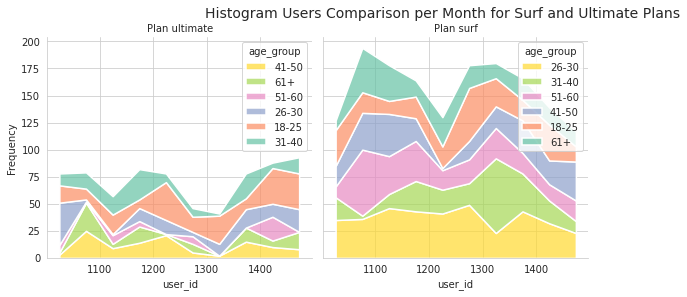

In [105]:
hist_plan_comparison2(df_usage, 'user_id', 'age_group', 'Histogram Users Comparison per Month for Surf and Ultimate Plans')

Disini kita dapat melihat sedikit persebaran pengguna berdasarkan umurnya. Persebaran umurnya cukup merata dengan paket ultimate banyak dari umur 31-40 dan 5- 60, sementara paket surf umur 61+ dan 18-22. Sementara dapat kita asumsikan bahwa paket ultimate lebih diminati pengguna pada umur produktifnya.

### Panggilan

In [106]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.

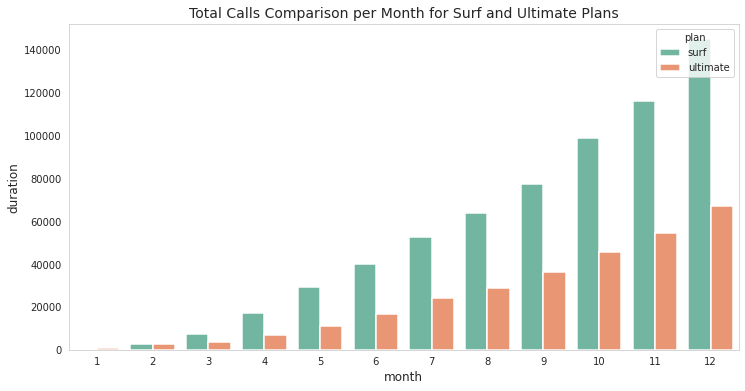

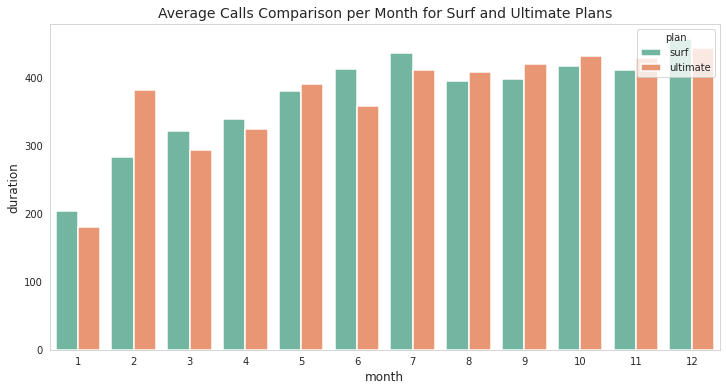

In [107]:
bar_plan_comparison(plan_usage_sum, x='month', y='duration', hue='plan', 
                     title='Total Calls Comparison per Month for Surf and Ultimate Plans')
bar_plan_comparison(plan_usage_mean, x='month', y='duration', hue='plan', 
                     title='Average Calls Comparison per Month for Surf and Ultimate Plans')

In [108]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.

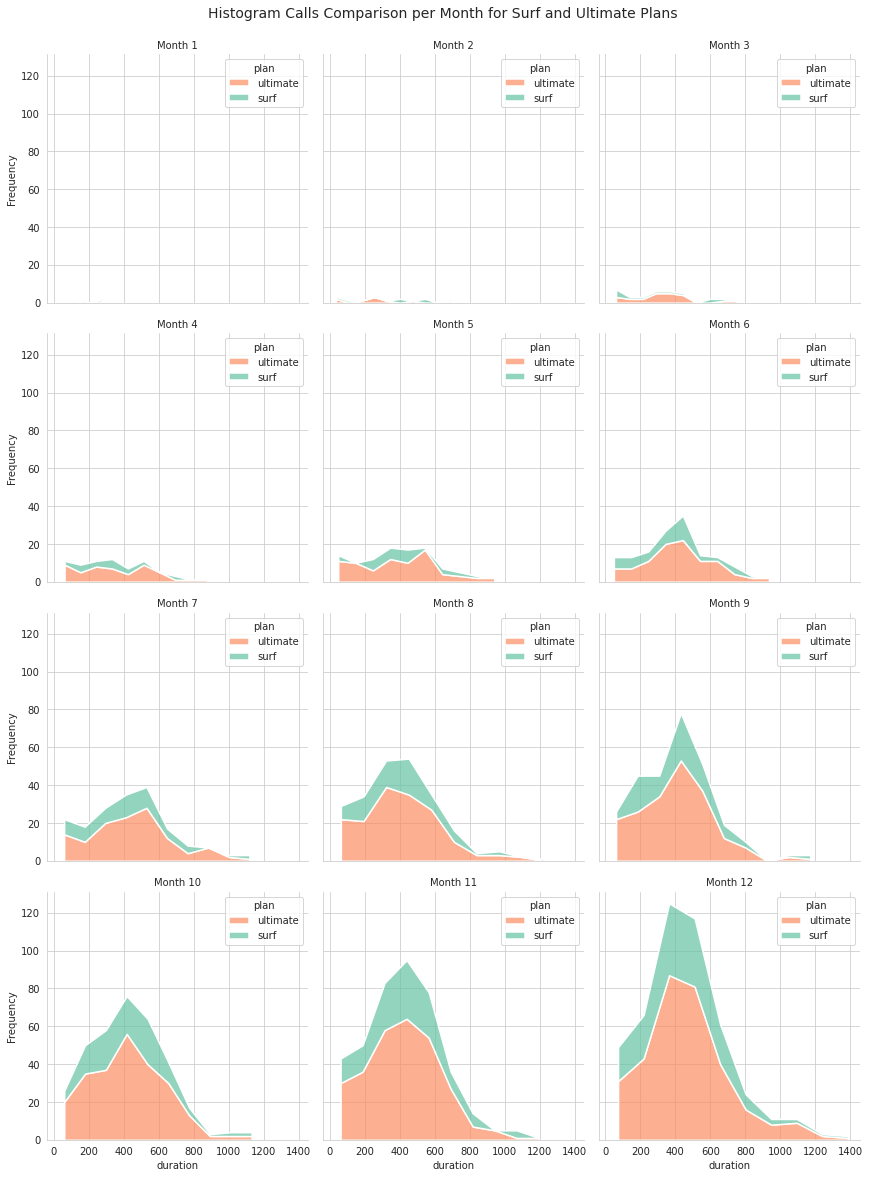

In [109]:
hist_plan_comparison(df_usage, 'duration', 'plan', 'Histogram Calls Comparison per Month for Surf and Ultimate Plans')

Secara rata-rata terdapat kemiripan perilaku pengguna ketika menelepon, walaupun secara jumlah total panggilan telepon pengguna dengan paket surf terlihat lebih banyak yang tentunya kenaikannya perbulan selaras dengan kenaikan pengguna paket surf.

In [110]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
duration_month = df_usage.groupby(['plan_name', 'month'])['duration'].agg([np.mean, np.var])
duration_month

mean           var
plan_name month                          
surf      1      203.000000  15842.000000
          2      282.444444  42843.777778
          3      320.260870  35396.292490
          4      338.500000  46051.561224
          5      380.012987  54108.065619
          6      411.360825  41014.212199
          7      435.586777  57115.377824
          8      394.197531  50337.103596
          9      397.541237  43221.731451
          10     416.063291  48585.271401
          11     409.643110  48336.939553
          12     455.383648  59497.959606
ultimate  1      180.750000  15447.583333
          2      381.142857  66909.142857
          3      293.500000  60025.545455
          4      324.095238  32842.290476
          5      390.137931  39952.266010
          6      357.829787  40545.318224
          7      410.440678  67606.526593
          8      407.309859  52573.159759
          9      419.337209  53696.814364
          10     430.018868  51478.475831
          11     427.527559  55461.854393
          12     442.437086  58851.247682

In [111]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan

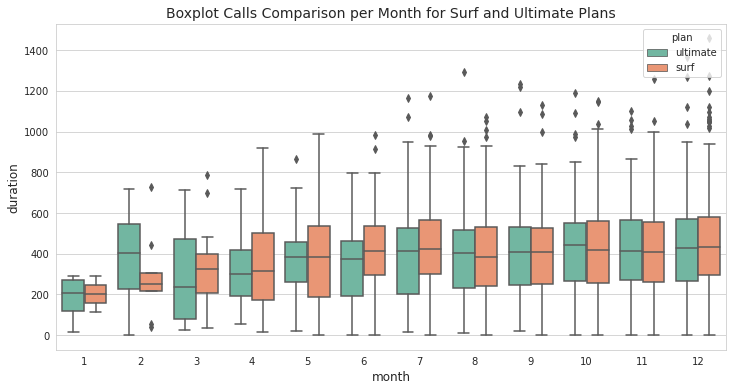

In [112]:
boxplot_plan_comparison(df_usage, 'month', 'duration', 'plan', 
                      'Boxplot Calls Comparison per Month for Surf and Ultimate Plans')

Berdasarkan hasil diatas perilaku pengguna kedua paket cenderung sama, hanya ada perbedaan yang mencolok pada bulan kedua. Bahkan pengguna paket surf cenderung memiliki durasi yang lebih tinggi daripada pengguna paket ultimate dan ada beberapa yang melebihi kuota bulanannya, hal ini tentunya sangat menarik mengingat paket ultimate memiliki kuota yang tinggi. Kemungkinan karena biaya tambahan yang tidak terlalu mahal membuat pengguna paket surf tetap bertahan dengan paketnya. 

### Pesan/SMS

In [113]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya


In [114]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket


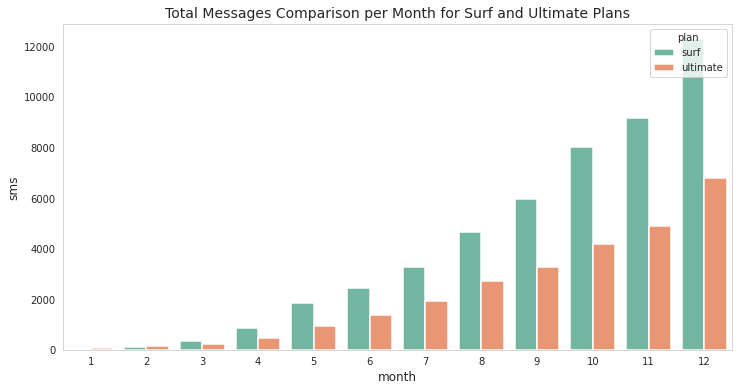

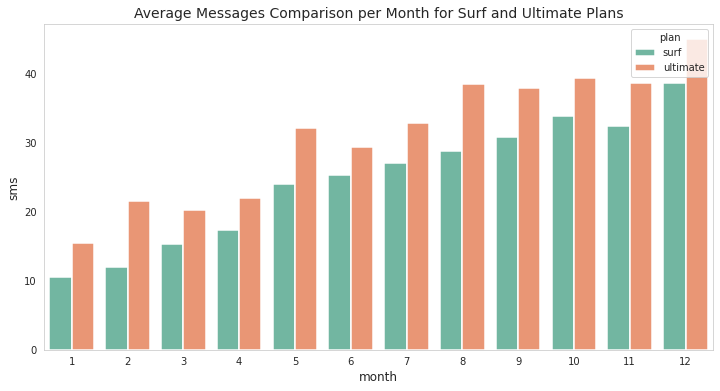

In [115]:
bar_plan_comparison(plan_usage_sum, x='month', y='sms', hue='plan', 
                     title='Total Messages Comparison per Month for Surf and Ultimate Plans')
bar_plan_comparison(plan_usage_mean, x='month', y='sms', hue='plan', 
                     title='Average Messages Comparison per Month for Surf and Ultimate Plans')

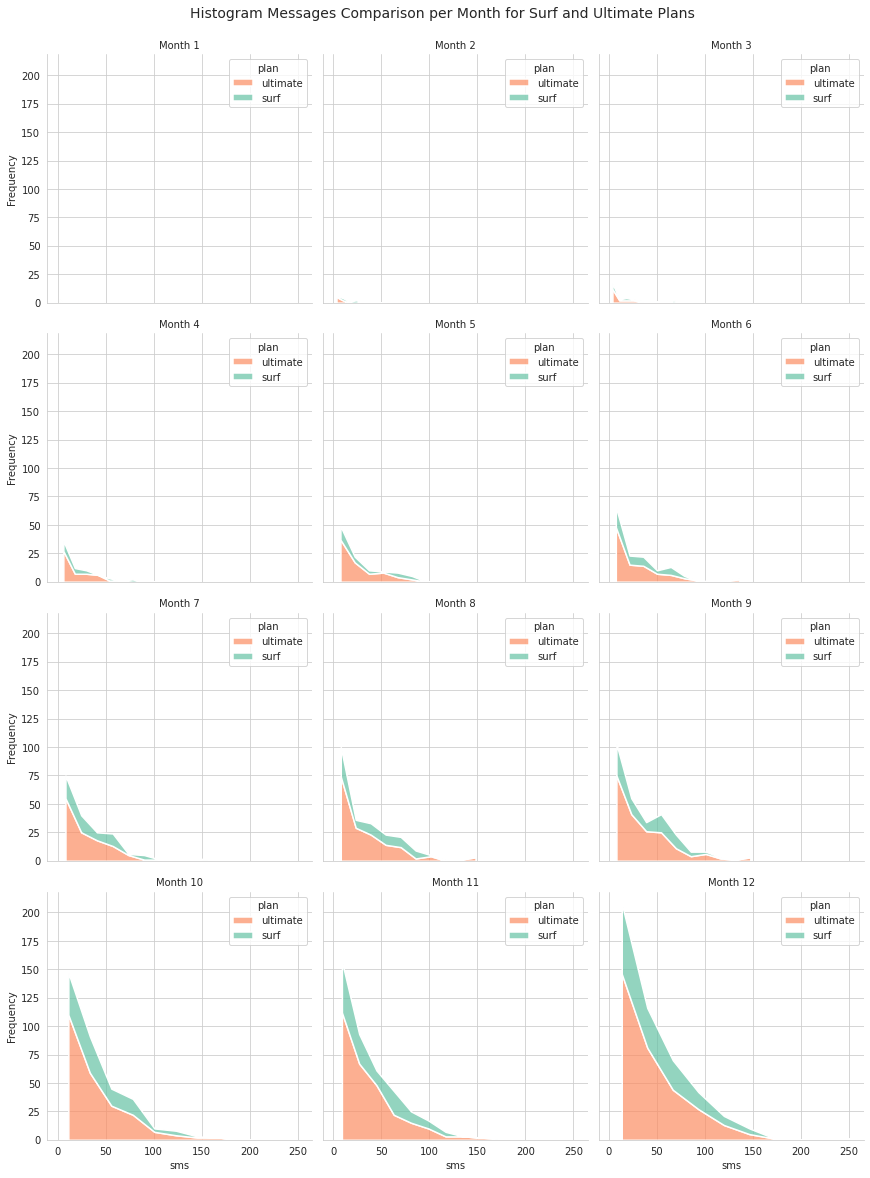

In [116]:
hist_plan_comparison(df_usage, 'sms', 'plan', 'Histogram Messages Comparison per Month for Surf and Ultimate Plans')

Kuota untuk sms adalah 50 sms perbulan untuk paket surf dan 1000 sms perbulan untuk paket ultimate. Tentunya tidak ada pengguna dari paket ultimate yang melebihi 1000 kuota, akan tetapi ternyata banyak pengguna paket surf yang merasa tidak masalah membayar biaya tambahan untuk sms.

In [117]:
sms_month = df_usage.groupby(['plan_name', 'month'])['sms'].agg([np.mean, np.var])
sms_month

mean          var
plan_name month                        
surf      1      10.500000   220.500000
          2      12.000000   386.000000
          3      15.260870   346.565217
          4      17.400000   501.591837
          5      24.012987   847.197198
          6      25.298969   914.920103
          7      27.033058   923.915565
          8      28.777778  1029.515528
          9      30.762887  1003.829496
          10     33.839662  1275.465708
          11     32.385159  1065.344034
          12     38.600629  1458.158612
ultimate  1      15.500000   313.666667
          2      21.571429   478.285714
          3      20.250000   654.386364
          4      22.047619   544.147619
          5      32.103448  1297.310345
          6      29.340426   857.620722
          7      32.830508   960.488019
          8      38.478873  1196.367404
          9      37.895349  1050.918331
          10     39.443396  1221.106289
          11     38.606299  1232.669166
          12     45.006623  1549.419956

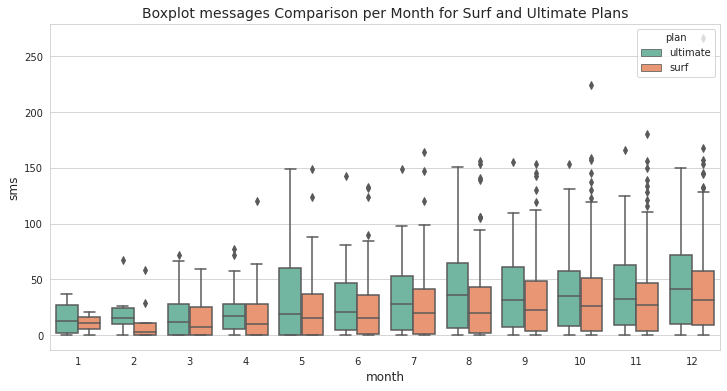

In [118]:
boxplot_plan_comparison(df_usage, 'month', 'sms', 'plan', 
                      'Boxplot messages Comparison per Month for Surf and Ultimate Plans')

Di zamam modern ini penggunaan sms cenderung sudah ditinggalkan, tapi ternyata klien dari Megaline masih membutuhkan fitur sms ini. Ini dapatdilihat dari perilaku penggunaan sms yang cukup stabil setelah tiga bulan pertama. akan tetapi jarak batas atas pada boxplot cenderung lebih jauh dari bawahnya yang artinya hanya sebagian kecil pengguna yang menggunakan sms dengan jumlah yang cukup tinggi.

### Internet

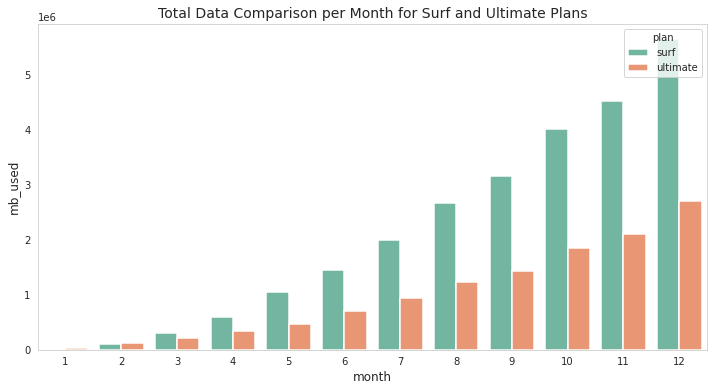

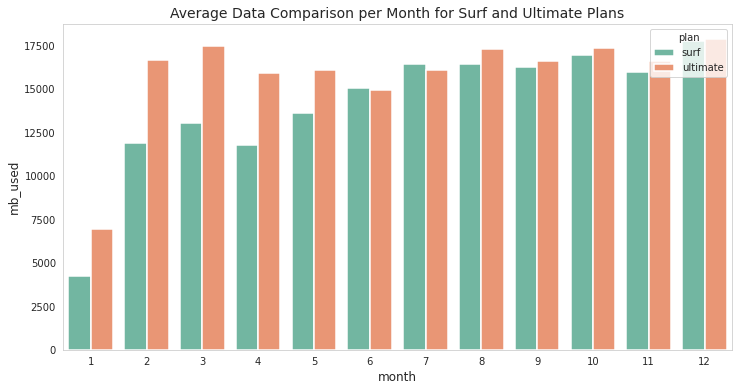

In [119]:
bar_plan_comparison(plan_usage_sum, x='month', y='mb_used', hue='plan', 
                     title='Total Data Comparison per Month for Surf and Ultimate Plans')
bar_plan_comparison(plan_usage_mean, x='month', y='mb_used', hue='plan', 
                     title='Average Data Comparison per Month for Surf and Ultimate Plans')

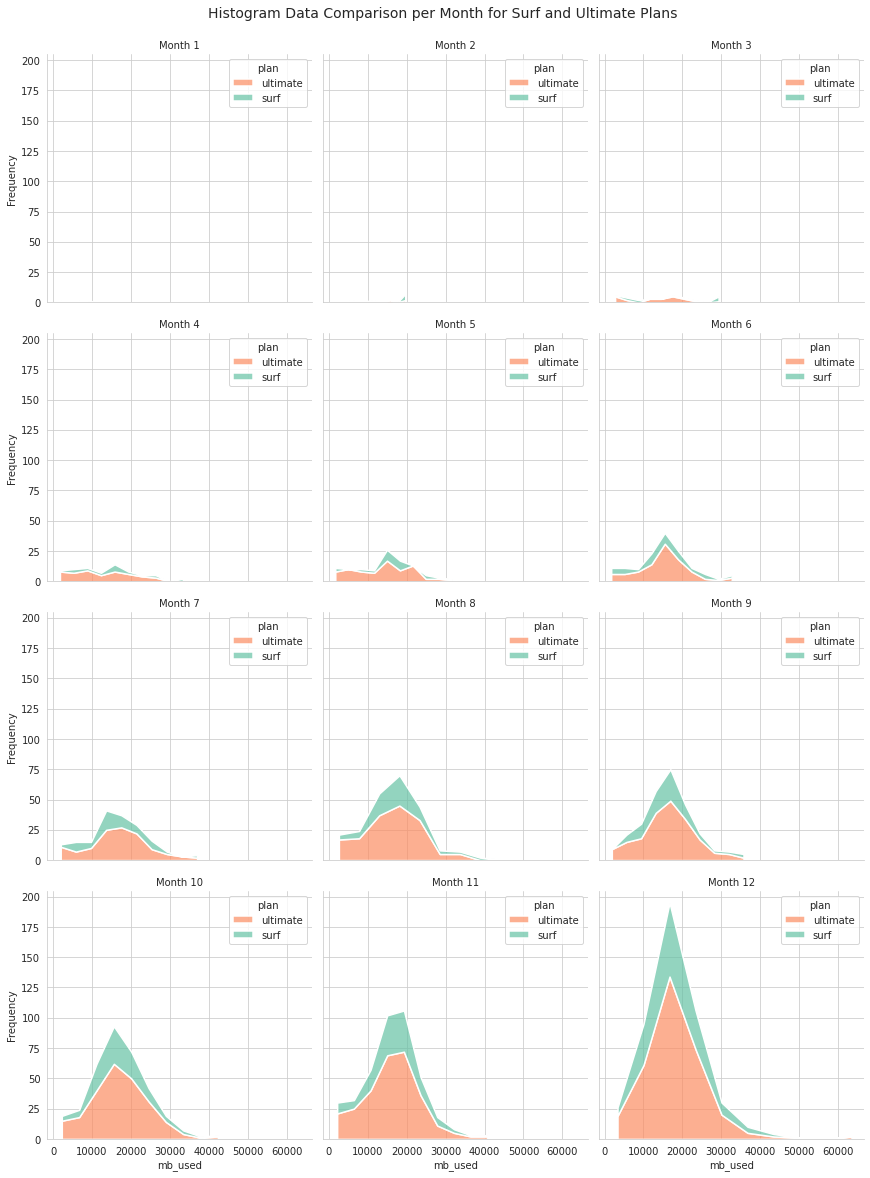

In [120]:
hist_plan_comparison(df_usage, 'mb_used', 'plan', 'Histogram Data Comparison per Month for Surf and Ultimate Plans')

Paket data internet pada dasawarsa ini merupakan paket yang lebih diminati sebagian orang, tentunya keberadaan wifi di ruang publik dan pribadi tidak jarang mengurangi niat pengguna untuk mengambil paket data dengan kuota yang lebih tinggi. Pada data klien Megaline diatas terlihat hampir setengah pengguna paket surf rela membayar biaya tambahan untuk paket data mereka, namun jika kita perhatikan perilaku konsumsi paket data dari pengguna kedua paket cenderung sama. Tentunya kuota 30 gb untuk paket ultimate perlu dipertanyakan.

In [121]:
internet_month = df_usage.groupby(['plan_name', 'month'])['mb_used'].agg([np.mean, np.var])
internet_month

mean           var
plan_name month                            
surf      1       4259.315000  1.156213e+07
          2      11903.212222  4.566156e+07
          3      13009.173913  6.530797e+07
          4      11775.286000  5.648291e+07
          5      13625.316883  5.566728e+07
          6      15011.284330  4.563384e+07
          7      16440.102810  6.188661e+07
          8      16416.776111  6.867834e+07
          9      16232.329124  4.847192e+07
          10     16913.652447  5.770870e+07
          11     15957.559753  5.338601e+07
          12     17712.974245  6.695672e+07
ultimate  1       6918.092500  1.639471e+07
          2      16639.722857  3.412695e+07
          3      17465.520833  1.187289e+08
          4      15878.957619  8.269173e+07
          5      16089.186552  4.963663e+07
          6      14915.419574  6.596543e+07
          7      16062.362542  6.565152e+07
          8      17258.868592  5.353077e+07
          9      16576.760233  4.564323e+07
          10     17336.545094  5.291639e+07
          11     16564.605512  5.199115e+07
          12     17838.362119  5.649087e+07

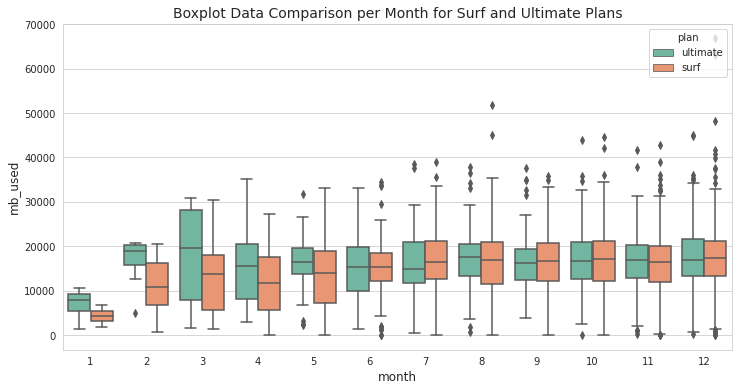

In [122]:
boxplot_plan_comparison(df_usage, 'month', 'mb_used', 'plan', 
                      'Boxplot Data Comparison per Month for Surf and Ultimate Plans')

Penggunaan paket data pada tiga bulan pertama terlihat berbeda antara pengguna paket surf dan ultimate, tapi di bulan- bulan berikutnya perilakunya cenderung mirip antara pelanggan dengan kedua paket tersebut. Tentunya menarik disini bahwa pengunaan paket data dari pelanggan dengan paket prabayar yang berbeda terlihat mirip, mungkin Megaline perlu meninjau kembali kuota paa paket mereka.

## Pendapatan

[Seperti halnya Anda telah mempelajari perilaku pengguna, deskripsikan secara statistik pendapatan yang diperoleh antara tiap-tiap paket prabayar].

In [123]:
user_plan['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

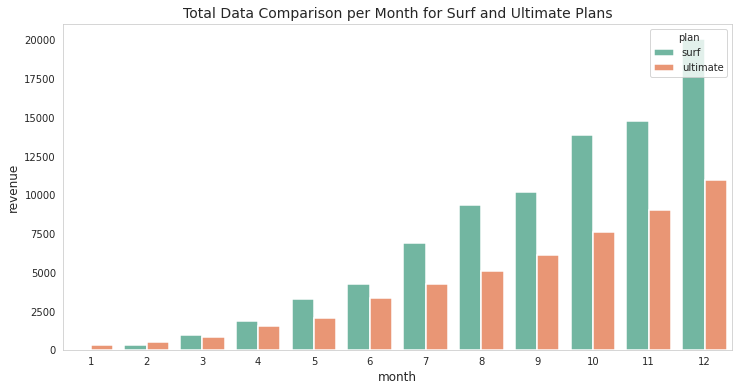

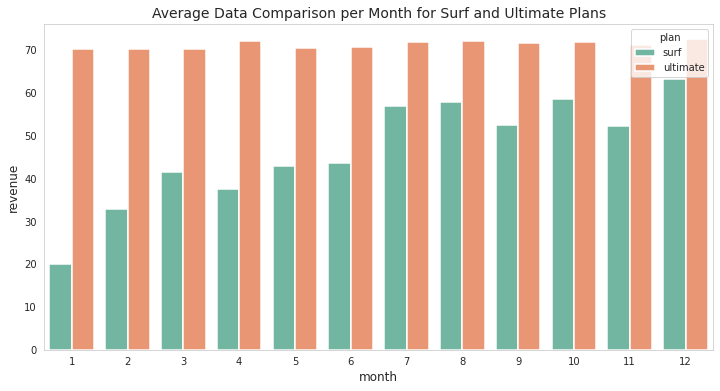

In [124]:
bar_plan_comparison(plan_usage_sum, x='month', y='revenue', hue='plan', 
                     title='Total Data Comparison per Month for Surf and Ultimate Plans')
bar_plan_comparison(plan_usage_mean, x='month', y='revenue', hue='plan', 
                     title='Average Data Comparison per Month for Surf and Ultimate Plans')

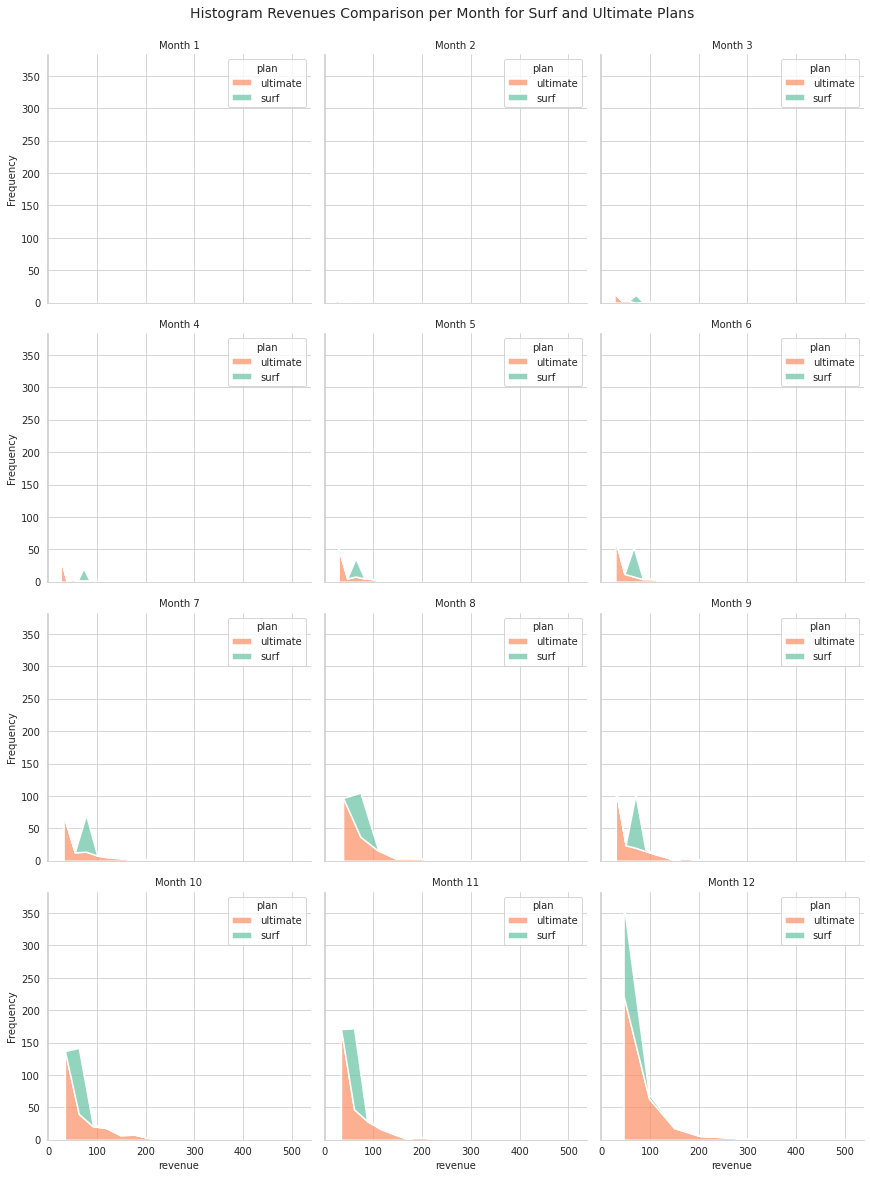

In [125]:
hist_plan_comparison(df_usage, 'revenue', 'plan', 'Histogram Revenues Comparison per Month for Surf and Ultimate Plans')

In [126]:
revenue_month = df_usage.groupby(['plan_name', 'month'])['revenue'].agg([np.mean, np.var])
revenue_month

mean          var
plan_name month                        
surf      1      20.000000     0.000000
          2      32.858211   374.784929
          3      41.391941  1256.340036
          4      37.348278   953.389345
          5      42.782322  1398.003940
          6      43.612884  1562.593053
          7      56.799766  2540.016994
          8      57.608741  2949.945981
          9      52.353138  1858.144478
          10     58.438104  2608.712211
          11     52.107770  2023.032593
          12     62.989219  3953.537787
ultimate  1      70.000000     0.000000
          2      70.000000     0.000000
          3      70.033577     0.013529
          4      71.900163    45.801466
          5      70.235963     1.614678
          6      70.571188     7.762416
          7      71.713220    85.438793
          8      71.824665    66.046640
          9      71.422314    45.183569
          10     71.622789    95.667249
          11     71.011861    63.597175
          12     72.337328   150.611131

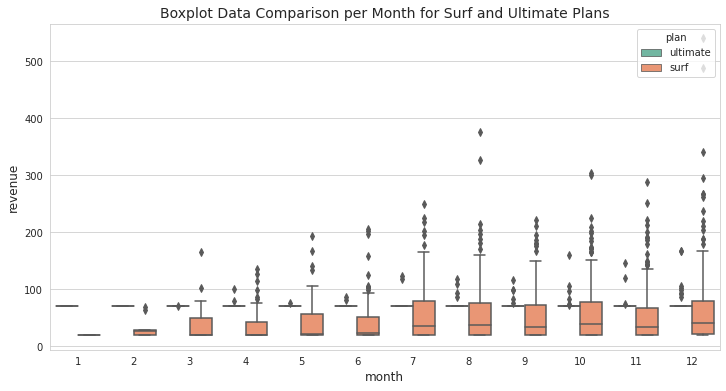

In [127]:
boxplot_plan_comparison(df_usage, 'month', 'revenue', 'plan', 
                      'Boxplot Data Comparison per Month for Surf and Ultimate Plans')

Sekitar 67.8 % pengguna megaline berlangganan paket prabayar surf dan sisanya paket prabayar ultimate. Jumlah pengguna paket prabayar surf sekitar 2x lipat dari pengguna paket prabayar ultimate. Akan tetapi harga paket prabayar ultimate 70 usd sementara harga paket prabayar surf hanya 20 usd yang artinya hampir 1/3xnya. Menariknya disini revenue yang didapat dari pengguna dengan paket prabayar surf tetap lebih tinggi walaupun jumlahnya hanya dua 2x lipatnya sedangkan harnganya lebih dari 1/3nya. Tentunya dapat diasumsikan tambahan revenue tersebut berasal dari prilaku pengguna paket prabayar surf yang cenderung memakai paketnya melebihi kuota.

## Menguji Hipotesis Statistik

Dalam bab ini kita akan melakukan dua pengujian hipotesis
<ol>
    <li>hipotesis yang menyatakan bahwa pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda.</li>
    <li>hipotesis bahwa pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.</li>
    </ol>

Pengujian hipotesis dilakukan dalam beberapa langkah:
<ol>
    <li>Nyatakan Hipotesis Nol (H0) dan Hipotesis Alternatif (Ha)</li>
    <li>Pilih Tingkat Signifikansi (α)</li>
    <li>Pilih Statistik Uji</li>
    <li>Tentukan Distribusi dan Daerah Kritis</li>
    <li>Kumpulkan dan Analisis Data Sampel</li>
    <li>Hitung Nilai p:
            Jika nilai p ≤ α, tolak hipotesis nol dan terima hipotesis alternatif.
            Jika nilai p > α, gagal menolak hipotesis nol.
    </li>
    <li>Buat Keputusan</li>
    <li>Tarik Kesimpulan</li>
    </ol>

1. hipotesis yang menyatakan bahwa pendapatan rata-rata dari pengguna paket prabayar Ultimate dan Surf berbeda.

- H0: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
- Ha: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak berbeda.

In [128]:
# Uji hipotesisnya

In [129]:
surf = df_usage[df_usage['plan'] == 'surf']['revenue']
ultimate = df_usage[df_usage['plan'] == 'ultimate']['revenue']

alpha = 0.05
results = st.ttest_ind(surf, ultimate)
p_value_formatted = format(results.pvalue, '.19f')
print('p-value:', p_value_formatted)

if results.pvalue < alpha:
    print("Kita menolak H0 karena data yang ada cukup untuk membuktikan H0 salah")
else:
    print("Kita tidak dapat menolak H0 karena data yang ada tidak cukup untuk membuktikan H0 salah") 

p-value: 0.0000000000000000004
Kita menolak H0 karena data yang ada cukup untuk membuktikan H0 salah


2. hipotesis bahwa pendapatan rata-rata dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

- H0: Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.
- Ha: Rata-rata pendapatan dari pengguna di wilayah NY-NJ tidak berbeda dengan pendapatan pengguna dari wilayah lain.

In [130]:
# Uji hipotesisnya

In [131]:
ny_nj = df_usage.query('city.str.contains("ny") | city.str.contains("nj")')['revenue']
others = df_usage.query('city.str.contains("ny") == 0 & city.str.contains("nj") == 0')['revenue']

alpha = 0.05
results = st.ttest_ind(ny_nj, others)
p_value_formatted = format(results.pvalue, '.19f')
print('p-value:', p_value_formatted)

if results.pvalue < alpha:
    print("Kita menolak H0 karena data yang ada cukup untuk membuktikan H0 salah")
else:
    print("Kita tidak dapat menolak H0 karena data yang ada tidak cukup untuk membuktikan H0 salah") 

p-value: 0.2539275512664601608
Kita tidak dapat menolak H0 karena data yang ada tidak cukup untuk membuktikan H0 salah


## Kesimpulan Umum

Dari hasil analisis yang telah dilakukan, didapatkan bahwa paket prabayar surf lebih menguntungkan dibanding paket prabayar ultimate, karena paket surf lebih terjangkau dan menjadi favorit klien Megaline. 

- Data terdiri dari 5 tabel:
                            - df_users
                            - df_plans
                            - df_calls
                            - df_messages
                            - df_internet
- df_users berisi data 500 klien Megaline, alamt, nama, dan status langganan pada tahun 2018.
- df_plans berisi data ketentuan dan harga paket prabayar.
- df_calls berisi data jumlah panggilan dan durasi telepon pengguna.
- df_messages berisi jumlah sms pengguna.
- df_internet berisi jumlah session dan data internet pengguna.
- Tidak terdapat duplikat pada data.
- Terdapat nilai yang hilang pada kolom churn_date.
- Dalam pra pemrosesan data ada beberapa tipe data yang harus diubah seperti data dengan format datetime.
- Kemudian dilakukan pengagregasian terhadap data-data yang dibutuhkan menjadi satu tabel yang berisi data pengguna dan data konsumsi pengguna.
- Dari data tersebut dilakukan analisis untuk mendapatkan nilai revenue yang dibutuhkan. 
- Analisis data eksploratif dilakukan untuk melihat perilaku dari konsumen dengan dua jenis paket prabayar yang ada.
- Didapatkan pengguna surf lebih banyak dari pengguna ultimate dengan presentase sekitar 68% dari total pelanggan.
- Perilaku pengguna surf lebih cenderung menghabiskan bahkan melewati kuota paket tersebut.
- Sementara pengguna ultimate lebih cenderung menghabiskan data dibawah kuota.
- Kemudian dilakukan pengecekan terhadap dua hipotesis yang ada.
- Pengecekan pertama: 
    - H0: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
    - Ha: Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak berbeda.
    - p-value: 0.0000000000000000004
    - Kita menolak H0 karena data yang ada cukup untuk membuktikan H0 salah.
- Pengecekan kedua: 
    - H0: Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.
    - Ha: Rata-rata pendapatan dari pengguna di wilayah NY-NJ tidak berbeda dengan pendapatan pengguna dari wilayah lain.
    - p-value: 0.2539275512664601608
    - Kita tidak dapat menolak H0 karena data yang ada tidak cukup untuk membuktikan H0 salah.